In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib notebook

In [73]:
dataset=pd.read_csv('train.csv')

In [74]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
def replaceUnknown(dataset,column,value):
    dataset[column].fillna(value,inplace=True)
    return dataset[column].unique()

In [77]:
replaceUnknown(dataset,'Gender','Unknown')

replaceUnknown(dataset,'Married','Unknown')

dataset["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [78]:
replace={'3+':'3'}
dataset['Dependents'].replace(replace,inplace=True)
dataset['Dependents'].fillna('Unknown',inplace=True)

In [79]:
dataset['Self_Employed'].unique()
dataset['Self_Employed'].fillna('Unknown',inplace=True)

In [80]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

dataset['Loan_Amount_Term'].fillna(dataset['LoanAmount'].mean(),inplace=True)

dataset['Credit_History'].fillna('Unknown',inplace=True)
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
#############################  data preprocessing finished #########################

<IPython.core.display.Javascript object>


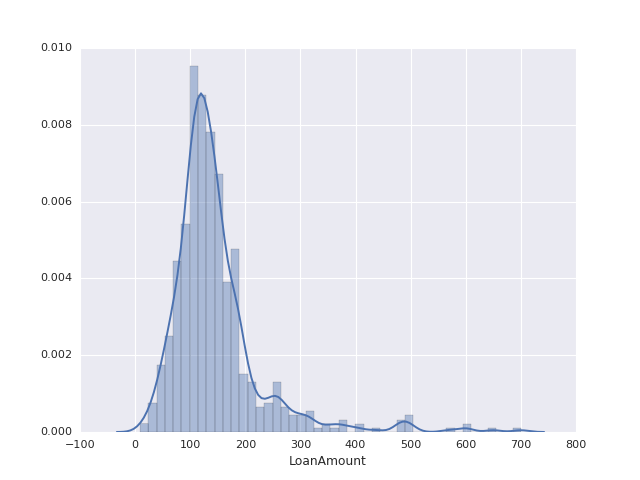

In [106]:
#Exploratory data analysis
sns.distplot(dataset['LoanAmount'])

<IPython.core.display.Javascript object>


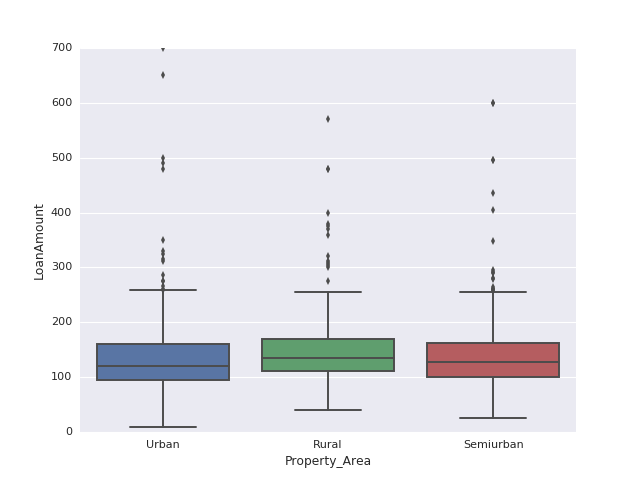

In [107]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=dataset)

<IPython.core.display.Javascript object>


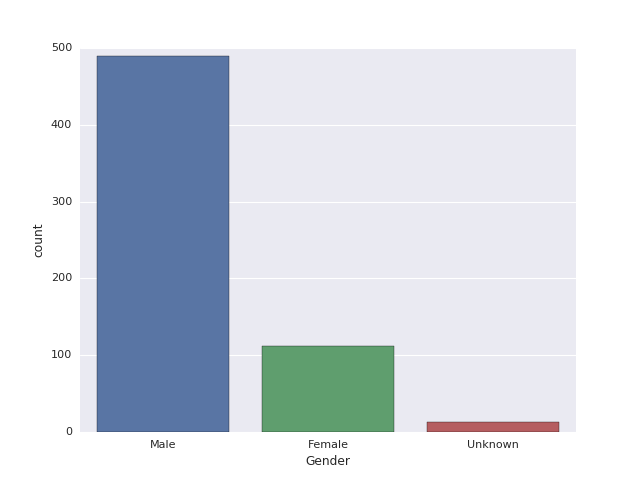

In [108]:
sns.countplot(x='Gender',data=dataset)

<IPython.core.display.Javascript object>


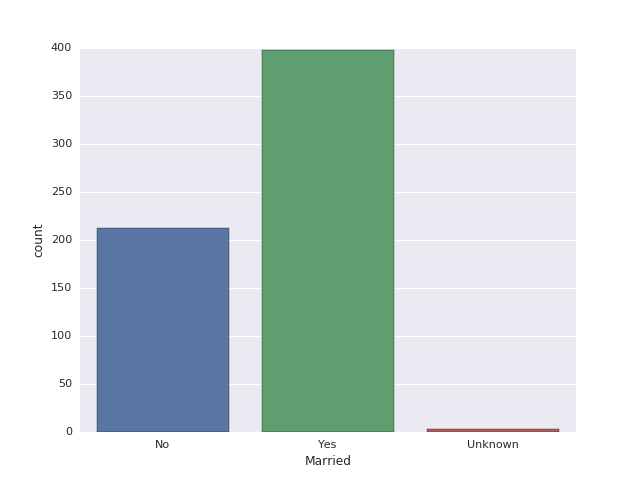

In [110]:
sns.countplot(x='Married',data=dataset)

<IPython.core.display.Javascript object>


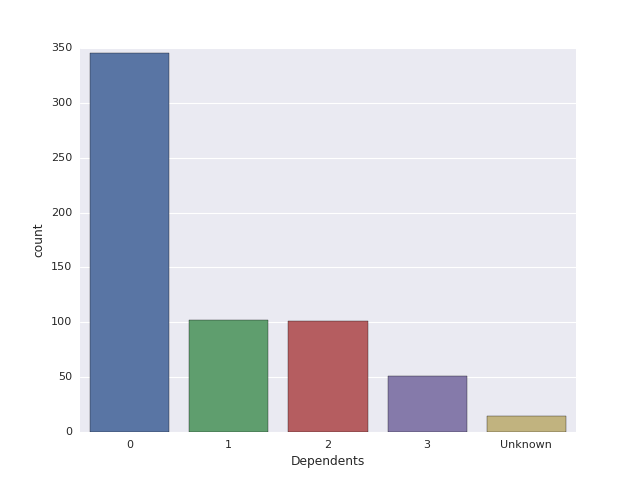

In [111]:
sns.countplot(x='Dependents',data=dataset)

In [87]:
dataset['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [88]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [89]:
test_data=pd.read_csv('test.csv')

In [90]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [91]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [92]:
test_data.Gender.fillna('Unknown',inplace=True)

In [93]:
replace={'3+':'3'}
test_data.Dependents.replace(replace,inplace=True)

In [94]:
test_data.Dependents.fillna('Unknown',inplace=True)

In [95]:
test_data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [96]:
test_data.Self_Employed.fillna('Unknown',inplace=True)

In [97]:
test_data['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

test_data['Loan_Amount_Term'].fillna(dataset['LoanAmount'].mean(),inplace=True)

test_data['Credit_History'].fillna('Unknown',inplace=True)
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [98]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)

In [99]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
train=pd.get_dummies(dataset,columns=cols)

In [100]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_Unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,Y,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,N,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,Y,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2583,2358.0,120.000000,360.0,Y,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,Y,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [112]:
from sklearn.model_selection import train_test_split 

In [113]:
x=train.drop('Loan_Status',axis=1)
y=train.Loan_Status
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [101]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,Unknown,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban


In [102]:
test_data.drop('Loan_ID',axis=1,inplace=True)

In [103]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [104]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
test_data=pd.get_dummies(test_data,columns=cols)

In [105]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Yes,Dependents_0,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_Unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,3076,1500,126.0,360.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,5000,1800,208.0,360.0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,3276,0,78.0,360.0,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1


In [114]:
 y_train.shape

(429,)

In [115]:
y_test.shape

(185,)

In [141]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ass=accuracy_score(y_pred,y_test)
print(cm,ass)

[[ 23  28]
 [  5 129]] 0.8216216216216217


In [132]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [133]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [139]:
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
ass=accuracy_score(y_pred,y_test)
print(cm,ass)

[[ 28  23]
 [ 19 115]] 0.772972972972973


In [ ]:
#x_train,y_train,x_test,y_test
